### calculate R_LH0, R_LH, R_FH and R_ROD

In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
import statsmodels.regression.linear_model as sm

In [2]:
# read data
df = pd.read_csv("/Users/luzhang/Desktop/data/NVDA.csv")
df = pd.DataFrame(df)
# drop nas
df = df.dropna()

In [3]:
# data pre-cessing
#change sereis to datetime format
df['time']=pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

In [4]:
# Define Drop outlier day function to drop the incomplete transcation days
def DropOutlierday(data):
    # subset dataframe such that it only contains the complete transcation
    totalDay=pd.to_datetime(data.index.date).unique()
    completeDay=totalDay[day_keep]

    outlierday=totalDay.difference(completeDay)
    data['date'] = [d.date() for d in data.index]

    outlierday=outlierday.strftime('%Y-%m-%d')
    t=pd.DataFrame()
    
    for i in range(len(outlierday)):
        temp=pd.DataFrame(data['date'].loc[outlierday[i]])
        t=t.append(temp)
    
    data = data.drop(t.index) # drop the outlier day
    data = data.drop('date',1) # delete columne 'date'
    return data

##### R_LH0 and R_LH 

In [5]:
#subset df to calculate LH and LH0 
df_LH_LH0 = df[((df.index.hour == 15) & (df.index.minute == 30))|
        ((df.index.hour == 16) & (df.index.minute == 0))]
#df_LH_LH0

In [6]:
# find the complete transaction
rows_eachday = df_LH_LH0.groupby(df_LH_LH0.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2879

In [7]:
df_LH_LH0 = DropOutlierday(df_LH_LH0)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [8]:
#df_LH_LH0

In [9]:
df_LH_LH0['returns'] = df_LH_LH0['close'].pct_change();
#df_LH_LH0

In [10]:
df_LH = df_LH_LH0[((df_LH_LH0.index.hour == 16) & (df_LH_LH0.index.minute == 0))]
df_LH = df_LH.drop(['open','high','low','close','volume'],1)
df_LH = df_LH.rename(columns={"returns":"R_LH"})
df_LH

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/2187624823.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_LH = df_LH.drop(['open','high','low','close','volume'],1)


,R_LH
time,
2007-04-25 16:00:00,-0.002108
2007-04-26 16:00:00,-0.002975
2007-04-27 16:00:00,0.003636
2007-04-30 16:00:00,-0.008729
2007-05-01 16:00:00,-0.001801
...,...
2018-10-26 16:00:00,0.007725
2018-10-29 16:00:00,0.009793
2018-10-30 16:00:00,0.026288


In [11]:
df_LH0=df_LH.shift()
df_LH0=df_LH0.rename(columns={'R_LH':'R_LH0'})
df_LH0

,R_LH0
time,
2007-04-25 16:00:00,NaN
2007-04-26 16:00:00,-0.002108
2007-04-27 16:00:00,-0.002975
2007-04-30 16:00:00,0.003636
2007-05-01 16:00:00,-0.008729
...,...
2018-10-26 16:00:00,-0.001624
2018-10-29 16:00:00,0.007725
2018-10-30 16:00:00,0.009793


##### R_ROD

In [12]:
#subset df to calculate ROD
df_ROD = df[((df.index.hour == 15) & (df.index.minute == 30))|
        ((df.index.hour == 16) & (df.index.minute == 0))]
#df_ROD

In [13]:
# find the complete transaction
rows_eachday = df_ROD.groupby(df_ROD.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2879

In [14]:
df_ROD  = DropOutlierday(df_ROD)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [15]:
df_ROD['returns'] = df_ROD['close'].pct_change();
#df_ROD

In [16]:
df_ROD=df_ROD[((df_ROD.index.hour == 15) & (df_ROD.index.minute == 30))]
df_ROD=df_ROD.drop(['open','high','low','close','volume'],1)
df_ROD=df_ROD.rename(columns={'returns':'R_ROD'})
df_ROD

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/3208359948.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ROD=df_ROD.drop(['open','high','low','close','volume'],1)


,R_ROD
time,
2007-04-25 15:30:00,NaN
2007-04-26 15:30:00,0.014488
2007-04-27 15:30:00,-0.015219
2007-04-30 15:30:00,0.002714
2007-05-01 15:30:00,0.011847
...,...
2018-10-26 15:30:00,-0.053490
2018-10-29 15:30:00,-0.073024
2018-10-30 15:30:00,0.065729


### R_ON

In [17]:
df_ON=df[((df.index.hour == 9) & (df.index.minute == 31))|
        ((df.index.hour == 16) & (df.index.minute == 0))]
# Larry: 9:31 is the data for the first minute which is better than using the data for 9:29~9:30
df_ON

,open,high,low,close,volume
time,,,,,
2007-04-25 16:00:00,33.10,33.1500,33.100,33.13,59391.0
2007-04-26 09:31:00,33.11,33.2200,33.080,33.20,94162.0
2007-04-26 16:00:00,33.51,33.5300,33.470,33.51,45616.0
2007-04-27 09:31:00,33.41,33.4100,33.260,33.40,50012.0
2007-04-27 16:00:00,33.09,33.1200,33.080,33.12,80523.0
...,...,...,...,...,...
2018-10-30 16:00:00,202.70,203.2100,202.400,203.01,265629.0
2018-10-31 09:31:00,209.66,212.0400,208.930,210.29,492479.0
2018-10-31 16:00:00,210.82,210.9700,210.590,210.88,189721.0


In [18]:
rows_eachday = df_ON.groupby(df_ON.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2879

In [19]:
df_ON  = DropOutlierday(df_ON)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [20]:
df_ON['close_pre'] = df_ON['close'].shift()

In [21]:
df_ON = df_ON[((df_ON.index.hour == 9) & (df_ON.index.minute == 31))]

In [22]:
df_ON['R_ON'] = df_ON['open']/df_ON['close_pre']-1;
df_ON = df_ON.drop(["open","high","low","close","volume","close_pre"],1)
df_ON

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/2589525367.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ON = df_ON.drop(["open","high","low","close","volume","close_pre"],1)


,R_ON
time,
2007-04-26 09:31:00,NaN
2007-04-27 09:31:00,-0.002984
2007-04-30 09:31:00,0.012077
2007-05-01 09:31:00,0.017315
2007-05-02 09:31:00,0.004812
...,...
2018-10-26 09:31:00,-0.046082
2018-10-29 09:31:00,0.028746
2018-10-30 09:31:00,0.005064


### R_FH

In [23]:
df_FH = df[((df.index.hour == 9) & (df.index.minute == 31))|
        ((df.index.hour == 10) & (df.index.minute == 0))]
# Larry: use 9:31 data
#df_FH

In [24]:
rows_eachday = df_FH.groupby(df_FH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2901

In [25]:
df_FH = DropOutlierday(df_FH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [26]:
df_FH

,open,high,low,close,volume
time,,,,,
2007-04-26 09:31:00,33.1100,33.2200,33.0800,33.200,94162.0
2007-04-26 10:00:00,32.9400,32.9500,32.9300,32.940,26104.0
2007-04-27 09:31:00,33.4100,33.4100,33.2600,33.400,50012.0
2007-04-27 10:00:00,33.6500,33.7100,33.6500,33.700,18638.0
2007-04-30 09:31:00,33.5200,33.5200,33.3500,33.470,103826.0
...,...,...,...,...,...
2018-10-30 10:00:00,196.4206,196.6200,195.1700,195.191,81069.0
2018-10-31 09:31:00,209.6600,212.0400,208.9300,210.290,492479.0
2018-10-31 10:00:00,208.3555,208.6000,208.2500,208.540,36037.0


In [27]:
df_FH['open_pre30']=df_FH['open'].shift()

In [28]:
df_FH=df_FH[(df_FH.index.hour==10)&(df_FH.index.minute==0)]
df_FH

,open,high,low,close,volume,open_pre30
time,,,,,,
2007-04-26 10:00:00,32.9400,32.95,32.9300,32.940,26104.0,33.11
2007-04-27 10:00:00,33.6500,33.71,33.6500,33.700,18638.0,33.41
2007-04-30 10:00:00,33.7000,33.71,33.6900,33.710,30850.0,33.52
2007-05-01 10:00:00,33.3000,33.32,33.2900,33.320,39607.0,33.49
2007-05-02 10:00:00,33.2600,33.30,33.2000,33.260,24008.0,33.41
...,...,...,...,...,...,...
2018-10-26 10:00:00,202.0490,202.05,200.8000,201.110,32825.0,198.31
2018-10-29 10:00:00,202.0704,202.75,201.7100,202.460,31727.0,203.99
2018-10-30 10:00:00,196.4206,196.62,195.1700,195.191,81069.0,186.55


In [29]:
df_FH['R_FH'] = df_FH['open']/df_FH['open_pre30']-1
df_FH = df_FH.drop(["open","high","low","close","open_pre30",'volume'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/1210239203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FH['R_FH'] = df_FH['open']/df_FH['open_pre30']-1
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/1210239203.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_FH = df_FH.drop(["open","high","low","close","open_pre30",'volume'],1)


In [30]:
df_FH

,R_FH
time,
2007-04-26 10:00:00,-0.005134
2007-04-27 10:00:00,0.007183
2007-04-30 10:00:00,0.005370
2007-05-01 10:00:00,-0.005673
2007-05-02 10:00:00,-0.004490
...,...
2018-10-26 10:00:00,0.018854
2018-10-29 10:00:00,-0.009410
2018-10-30 10:00:00,0.052911


### R_ONFH

In [31]:
df_ONFH = df[((df.index.hour==16)&(df.index.minute==0))|
            ((df.index.hour==10)&(df.index.minute==0))]
df_ONFH

,open,high,low,close,volume
time,,,,,
2007-04-25 16:00:00,33.1000,33.15,33.1000,33.13,59391.0
2007-04-26 10:00:00,32.9400,32.95,32.9300,32.94,26104.0
2007-04-26 16:00:00,33.5100,33.53,33.4700,33.51,45616.0
2007-04-27 10:00:00,33.6500,33.71,33.6500,33.70,18638.0
2007-04-27 16:00:00,33.0900,33.12,33.0800,33.12,80523.0
...,...,...,...,...,...
2018-10-30 16:00:00,202.7000,203.21,202.4000,203.01,265629.0
2018-10-31 10:00:00,208.3555,208.60,208.2500,208.54,36037.0
2018-10-31 16:00:00,210.8200,210.97,210.5900,210.88,189721.0


In [32]:
rows_eachday = df_ONFH.groupby(df_ONFH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2880

In [33]:
df_ONFH = DropOutlierday(df_ONFH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [34]:
df_ONFH['close_preday']=df_ONFH['close'].shift()

In [35]:
df_ONFH=df_ONFH[((df_ONFH.index.hour==10)&(df_ONFH.index.minute==0))]
df_ONFH['R_ONFH']=df_ONFH['open']/df_ONFH['close_preday']-1
df_ONFH = df_ONFH.drop(['open','high','low','close','volume','close_preday'],1)
df_ONFH

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/3133853775.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ONFH = df_ONFH.drop(['open','high','low','close','volume','close_preday'],1)


,R_ONFH
time,
2007-04-26 10:00:00,NaN
2007-04-27 10:00:00,0.004178
2007-04-30 10:00:00,0.017512
2007-05-01 10:00:00,0.011543
2007-05-02 10:00:00,0.000301
...,...
2018-10-26 10:00:00,-0.028097
2018-10-29 10:00:00,0.019065
2018-10-30 10:00:00,0.058244


### R_M

In [36]:
df_M = df[((df.index.hour==10)&(df.index.minute==0)) |
         ((df.index.hour==15)&(df.index.minute==0))]
df_M

,open,high,low,close,volume
time,,,,,
2007-04-26 10:00:00,32.9400,32.9500,32.9300,32.9400,26104.0
2007-04-26 15:00:00,33.6100,33.6227,33.5900,33.6100,12160.0
2007-04-27 10:00:00,33.6500,33.7100,33.6500,33.7000,18638.0
2007-04-27 15:00:00,32.8900,32.8900,32.8700,32.8700,3184.0
2007-04-30 10:00:00,33.7000,33.7100,33.6900,33.7100,30850.0
...,...,...,...,...,...
2018-10-30 15:00:00,196.4500,196.4900,196.0101,196.0101,16079.0
2018-10-31 10:00:00,208.3555,208.6000,208.2500,208.5400,36037.0
2018-10-31 15:00:00,210.2400,210.3900,210.2400,210.3350,8765.0


In [37]:
rows_eachday = df_M.groupby(df_M.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2877

In [38]:
df_M = DropOutlierday(df_M)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [39]:
df_M['open_past30'] = df_M['open'].shift()
df_M = df_M[((df_M.index.hour==15)&(df_M.index.minute==0))]
df_M['R_M'] = df_M['close']/df_M['open_past30']-1
df_M = df_M.drop(['open','high','low','close','open_past30','volume'],1)
#df_M

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/3777036572.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_M = df_M.drop(['open','high','low','close','open_past30','volume'],1)


### R_SLH

In [40]:
df_SLH = df[((df.index.hour==15)&(df.index.minute==30)) |
           ((df.index.hour==15)&(df.index.minute==0))]

In [41]:
rows_eachday = df_SLH.groupby(df_SLH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2876

In [42]:
df_SLH = DropOutlierday(df_SLH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [43]:
df_SLH['close_pre60'] = df_SLH['close'].shift()
df_SLH = df_SLH[((df_SLH.index.hour==15)&(df_SLH.index.minute==30))]
df_SLH['R_SLH'] = df_SLH['close']/df_SLH['close_pre60']-1
df_SLH = df_SLH.drop(['open','high','low','close','volume','close_pre60'],1)
df_SLH

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_19687/17277474.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_SLH = df_SLH.drop(['open','high','low','close','volume','close_pre60'],1)


,R_SLH
time,
2007-04-26 15:30:00,0.000000
2007-04-27 15:30:00,0.003955
2007-04-30 15:30:00,-0.000304
2007-05-01 15:30:00,-0.004185
2007-05-02 15:30:00,-0.006057
...,...
2018-10-26 15:30:00,0.003263
2018-10-29 15:30:00,-0.021923
2018-10-30 15:30:00,0.009183


In [44]:
# keep the date and ignore the time
df_LH['new_date'] = [d.date() for d in df_LH.index]
df_LH0['new_date'] = [d.date() for d in df_LH0.index]
df_ROD['new_date'] = [d.date() for d in df_ROD.index]
df_ON['new_date'] = [d.date() for d in df_ON.index]
df_FH['new_date'] = [d.date() for d in df_FH.index]
df_ONFH['new_date'] = [d.date() for d in df_ONFH.index]
df_M['new_date'] = [d.date() for d in df_M.index]
df_SLH['new_date'] = [d.date() for d in df_SLH.index]

In [45]:
from functools import reduce

In [46]:
# merge by same date
data_frames=[df_LH, df_LH0, df_ROD, df_ON, df_FH, df_ONFH, df_M, df_SLH]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['new_date'],
                                            how='inner'), data_frames)

In [47]:
df_merged=df_merged.rename(columns={'new_date':'datetime'})

In [48]:
df_merged

,R_LH,datetime,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,-0.002975,2007-04-26,-0.002108,0.014488,NaN,-0.005134,NaN,0.020340,0.000000
1,0.003636,2007-04-27,-0.002975,-0.015219,-0.002984,0.007183,0.004178,-0.023180,0.003955
2,-0.008729,2007-04-30,0.003636,0.002714,0.012077,0.005370,0.017512,-0.014243,-0.000304
3,-0.001801,2007-05-01,-0.008729,0.011847,0.017315,-0.005673,0.011543,0.004505,-0.004185
4,0.000914,2007-05-02,-0.001801,-0.012932,0.004812,-0.004490,0.000301,-0.007216,-0.006057
...,...,...,...,...,...,...,...,...,...
2870,0.007725,2018-10-26,-0.001624,-0.053490,-0.046082,0.018854,-0.028097,-0.029295,0.003263
2871,0.009793,2018-10-29,0.007725,-0.073024,0.028746,-0.009410,0.019065,-0.069978,-0.021923
2872,0.026288,2018-10-30,0.009793,0.065729,0.005064,0.052911,0.058244,-0.002090,0.009183
2873,-0.004297,2018-10-31,0.026288,0.043249,0.032757,-0.006222,0.026331,0.009501,0.006918


In [49]:
df_merged=df_merged.set_index('datetime')

In [50]:
df_merged = df_merged.dropna()

In [53]:
df_merged.to_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum_2rd_try/Data/NVDA_Returns.csv", index=False)

### Visualization

In [55]:
uscore_returns = pd.read_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum_2rd_try/Data/NVDA_uscoreReturns.csv")
uscore_returns = uscore_returns.drop(uscore_returns.columns[0],axis=1)
uscore_returns

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,0.838727,0.206507,0.209638,0.314370,0.746521,0.585769,0.080202,0.854384
1,0.041928,0.838727,0.536708,0.858559,0.692589,0.860647,0.161621,0.462944
2,0.295929,0.041580,0.706507,0.920146,0.295233,0.778184,0.633786,0.139005
3,0.602470,0.295233,0.244781,0.666841,0.329332,0.470251,0.283403,0.080550
4,0.127523,0.602470,0.848469,0.808107,0.763570,0.858559,0.684934,0.469207
...,...,...,...,...,...,...,...,...
2869,0.949026,0.311587,0.030097,0.009569,0.935456,0.049930,0.051322,0.817502
2870,0.974774,0.949026,0.011656,0.969207,0.191893,0.877349,0.002958,0.002610
2871,0.997042,0.974774,0.981733,0.677279,0.996347,0.991475,0.434760,0.960856
2872,0.135873,0.997042,0.942763,0.978253,0.278184,0.929193,0.759395,0.936152


In [56]:
nscoreReturns = norm.ppf(uscore_returns)# normalized the u-scored returns

In [57]:
nscoreReturns = pd.DataFrame(nscoreReturns, columns = uscore_returns.columns)
nscoreReturns = pd.DataFrame(nscoreReturns)
#sns.pairplot(nscoreReturns)

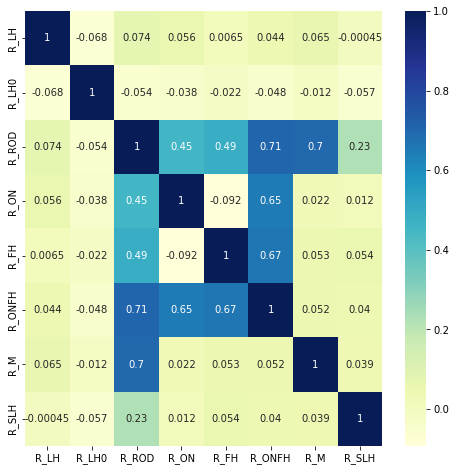

In [58]:
# heatmap to know the correlation better
# visualizing the data using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(nscoreReturns.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [59]:
nscoreReturns.to_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum_2rd_try/Data/NVDA_nscoreReturns.csv", index=False)

### Linear Regression

In [60]:
returns = pd.read_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum_2rd_try/Data/NVDA_nscoreReturns.csv")

In [61]:
returns.head()

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,0.989237,-0.818603,-0.807677,-0.483500,0.663580,0.216674,-1.403715,1.055423
1,-1.728742,0.989237,0.092145,1.073870,0.503202,1.083232,-0.987816,-0.093021
2,-0.536145,-1.732642,0.543208,1.406055,-0.538160,0.766074,0.341897,-1.084801
3,0.259747,-0.538160,-0.691006,0.431206,-0.441759,-0.074640,-0.572762,-1.401383
4,-1.138180,0.259747,1.029889,0.870942,0.717833,1.073870,0.481541,-0.077264


In [62]:
y = returns.R_LH

In [63]:
X = returns[returns.columns[1:8]]

In [64]:
lr_full = sm.OLS(y,X).fit()

In [65]:
lr_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   R_LH   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.009
Method:                 Least Squares   F-statistic:                              4.904
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    1.61e-05
Time:                        11:45:19   Log-Likelihood:                         -4060.2
No. Observations:                2874   AIC:                                      8134.
Df Residuals:                    2867   BIC:                                      8176.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R_LH0         -0.0656      0.019     -3.523      0.000      -0.102      -0.029
R_ROD          0.0710      0.105      0.676      0.499      -0.135       0.277
R_ON           0.0759      0.064      1.182      0.237      -0.050       0.202
R_FH           0.0306      0.065      0.468      0.640      -0.098       0.159
R_ONFH        -0.0793      0.105     -0.758      0.449      -0.285       0.126
R_M            0.0162      0.072      0.226      0.821      -0.124       0.156
R_SLH         -0.0204      0.026     -0.781      0.435      -0.071       0.031
==============================================================================
Omnibus:                        0.156   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.925   Jarque-Bera (JB):                0.204
Skew:                           0.002   Prob(JB):                        0.903
Kurtosis:                       2.959   Cond. No.                         13.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""